<h1>Stock Trend Prediction</h1>


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [11]:
dataset = pd.read_csv('SBIN_train.csv',index_col="Date",parse_dates=True)

In [12]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-20,274.750000,274.750000,271.799988,273.899994,268.961975,9678185.0
2017-03-21,274.399994,277.049988,270.149994,272.350006,267.439941,11898233.0
2017-03-22,270.299988,271.000000,266.799988,267.500000,262.677368,9887203.0
2017-03-23,269.000000,269.399994,266.700012,268.500000,263.659332,7998170.0
2017-03-24,269.500000,278.950012,268.649994,276.500000,271.515106,20133467.0


In [13]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [14]:
dataset = dataset.dropna()
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1118 entries, 2017-03-20 to 2021-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1118 non-null   float64
 1   High       1118 non-null   float64
 2   Low        1118 non-null   float64
 3   Close      1118 non-null   float64
 4   Adj Close  1118 non-null   float64
 5   Volume     1118 non-null   float64
dtypes: float64(6)
memory usage: 61.1 KB


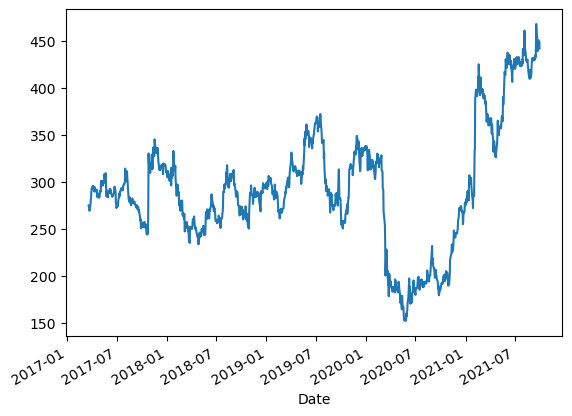

In [16]:
dataset['Open'].plot()
plt.show()

In [17]:
# dataset["Open"] = dataset["Open"].str.replace(',','').astype(float)
# dataset["Close"] = dataset["Close"].str.replace(',','').astype(float)
# dataset["High"] = dataset["High"].str.replace(',','').astype(float)
# dataset["Low"] = dataset["Low"].str.replace(',','').astype(float)
# dataset["Volume"] = dataset["Volume"].str.replace(',','').astype(float)

In [18]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-28,273.514282,276.407139,271.114284,274.328574,269.382830,1.346211e+07
2017-03-29,274.714281,278.571424,272.735713,276.407148,271.423928,1.650928e+07
2017-03-30,276.799997,280.957140,275.407144,279.078574,274.047193,1.762141e+07


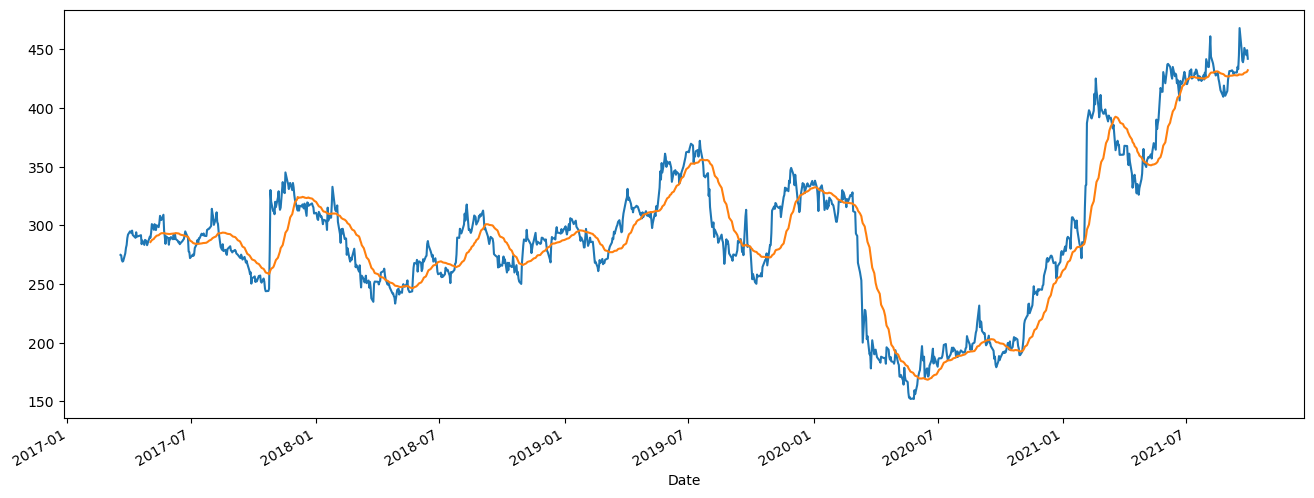

In [19]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()
plt.show()

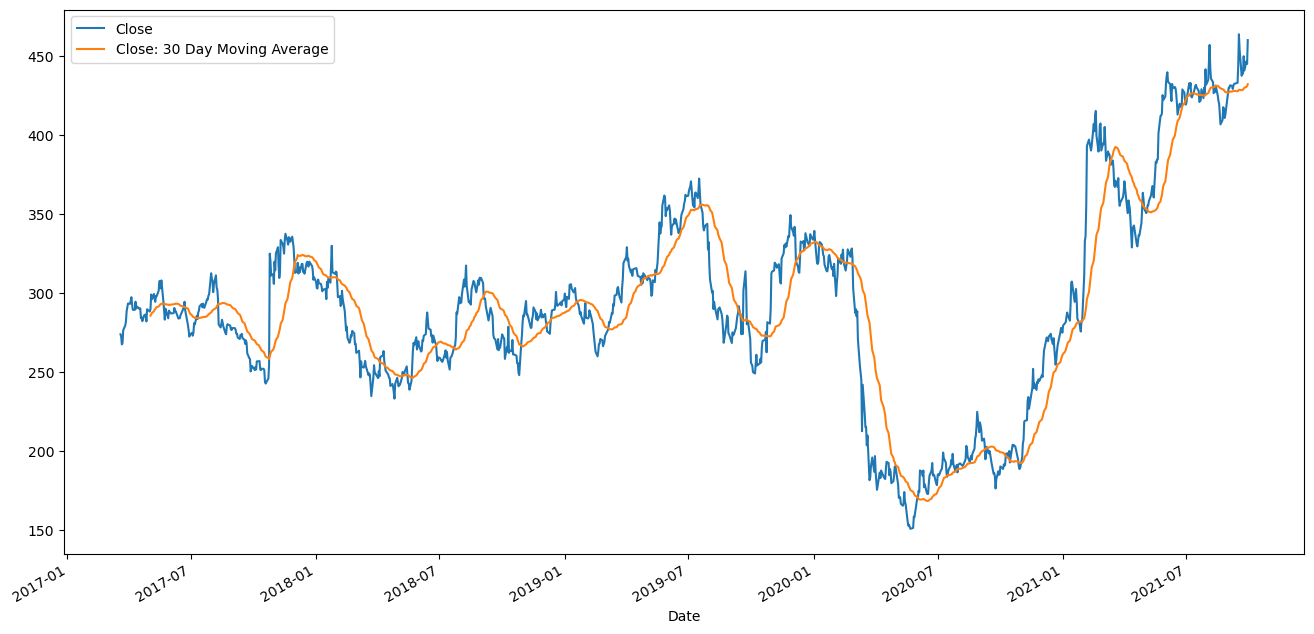

In [20]:
dataset['Close: 30 Day Moving Average'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Moving Average']].plot(figsize=(16,8))
plt.show()

<h1>Creating Training data, data reshaping and transformation</h1>



In [21]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)

In [22]:
# Data clenaing
dataset.isna().any()

Open                            False
High                            False
Low                             False
Close                           False
Adj Close                       False
Volume                          False
Close: 30 Day Moving Average     True
dtype: bool

In [23]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [24]:
# Creating a data structure with 60 timelapse and 1 output
X_train = []
y_train = []
for i in range(60,984):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)

#Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


<h1>Fitting Data in LSTM model</h1>




In [25]:
from keras.models import Sequential
regressor = Sequential()
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Adding the first Lstm and some  dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second Lstm and some  dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
               
#Adding the third Lstm and some  dropout regularisation       
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the 4th Lstm and some  dropout regularisation  
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
              
# output
regressor.add(Dense(units=1))


Using TensorFlow backend.


In [26]:
# compile the RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
924/924 [==============================] - 17s 19ms/step - loss: 0.0297
Epoch 2/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0093
Epoch 3/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0080
Epoch 4/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0065
Epoch 5/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0059
Epoch 6/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0057
Epoch 7/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0061
Epoch 8/100
924/924 [==============================] - 14s 15ms/step - loss: 0.0061
Epoch 9/100
924/924 [==============================] - 16s 17ms/step - loss: 0.0061
Epoch 10/100
924/924 [==============================] - 14s 16ms/step - loss: 0.0048
Epoch 11/100
924/924 [==============================] - 15s 16ms/step - loss: 0.0047
Epoch 12/100
924/924 [==============================] - 15s 16ms/step - lo

In [35]:

dataset_test = pd.read_csv('SBIN_test.csv',index_col="Date",parse_dates=True)
dataset_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,448.500000,455.549988,443.799988,451.649994,451.649994,14777309
2021-10-04,453.799988,464.399994,451.600006,463.149994,463.149994,16246765
2021-10-05,462.000000,469.000000,458.700012,464.700012,464.700012,16487568
2021-10-06,465.000000,471.000000,453.649994,457.200012,457.200012,19056690
2021-10-07,462.100006,464.000000,457.100006,457.899994,457.899994,9984651
2021-10-08,461.899994,464.000000,454.250000,458.000000,458.000000,16521128
2021-10-11,460.000000,474.950012,458.649994,469.250000,469.250000,20686981
2021-10-12,470.000000,484.399994,468.100006,483.000000,483.000000,33763609
2021-10-13,486.149994,486.149994,478.000000,481.700012,481.700012,17638983


In [36]:
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price

array([[455.549988],
       [464.399994],
       [469.      ],
       [471.      ],
       [464.      ],
       [464.      ],
       [474.950012],
       [484.399994],
       [486.149994],
       [493.899994]])

In [37]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-10-01 to 2021-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10 non-null     float64
 1   High       10 non-null     float64
 2   Low        10 non-null     float64
 3   Close      10 non-null     float64
 4   Adj Close  10 non-null     float64
 5   Volume     10 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 560.0 bytes


In [30]:
# dataset["Open"] = dataset["Open"].str.replace(',','').astype(float)
# dataset["Close"] = dataset["Close"].str.replace(',','').astype(float)
# dataset["High"] = dataset["High"].str.replace(',','').astype(float)
# dataset["Low"] = dataset["Low"].str.replace(',','').astype(float)
# dataset["Volume"] = dataset["Volume"].str.replace(',','').astype(float)

<h1>Testing & Predictiion</h1>



In [38]:
test_set = dataset_test['Open']
test_set = pd.DataFrame(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-10-01 to 2021-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [46]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,70):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)


[[427.76892]
 [433.57794]
 [439.6521 ]
 [446.22025]
 [447.69302]
 [444.02405]
 [444.4941 ]
 [444.03738]
 [454.24258]
 [470.07187]]


In [47]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()
print(predicted_stock_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float32
dtypes: float32(1)
memory usage: 168.0 bytes
            0
0  427.768921
1  433.577942
2  439.652100
3  446.220245
4  447.693024
5  444.024048
6  444.494110
7  444.037384
8  454.242584
9  470.071869


<h1>Visualization</h1>



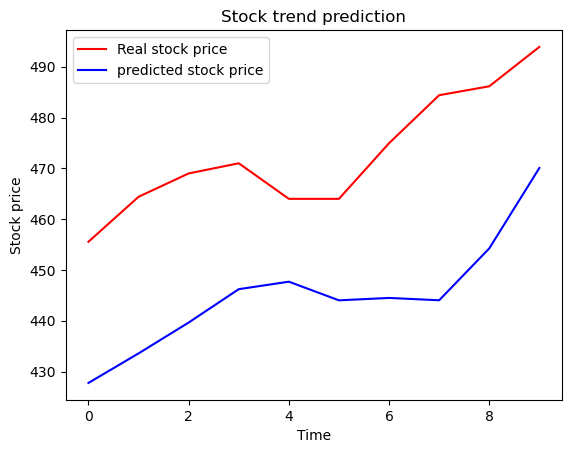

In [41]:
plt.plot(real_stock_price,color ="red",label="Real stock price")
plt.plot(predicted_stock_price, color="blue",label="predicted stock price")
plt.title('Stock trend prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()


In [2]:
def calculate_accuracy(expected_values,actual_values):
    num_correct =0
    for i in range(len(actual_values)):
        if actual_values[i] < 0 < expected_values[i]:
            num_correct+=1
        elif actual_values[i] > 0 > expected_values[i]:
            num_correct+=1
    return (num_correct/len(actual_values))*100

acc = calculate_accuracy(predicted_stock_price,dataset_total)
print("Accuracy : %d",acc)

Accuracy : 69%
